# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/harriken/employeeturnover

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
#these are all the packages we have imported to use for EDA in previous classwork

In [3]:
#although the complete dataset has four tables, based on my business questions, I will only be using "churn" and "votes"
churn=pd.read_csv("C:/Users/emmag/Desktop/Women+/archive (16)/churn.csv")
votes=pd.read_csv("C:/Users/emmag/Desktop/Women+/archive (16)/votes.csv")

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [4]:
print(churn.shape)
churn.head()
#I'm using shape to return the number of rows and columns in each dataframe
#I'm using head to get a snapshot of what each dataframe looks like, the columns it has, and the datatype for each column

(4847, 5)


,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True
1,-2,56aec740f1ef260003e307d6,0,Wed Jan 18 14:00:55 CET 2017,False
2,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True
3,487,56aec740f1ef260003e307d6,14,Sat Nov 19 15:02:14 CET 2016,False
4,3,56aec740f1ef260003e307d6,22,Thu Feb 16 01:00:00 CET 2017,True


In [5]:
#checking for missing data
percent_missing = churn.isnull().sum() * 100 / len(churn)
percent_missing

employee                 0.0
companyAlias             0.0
numVotes                 0.0
lastParticipationDate    0.0
stillExists              0.0
dtype: float64

In [6]:
print(votes.shape)
votes.head()

(221232, 4)


,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2


In [7]:
#checking for missing data
percent_missing2 = votes.isnull().sum() * 100 / len(votes)
percent_missing2

employee        0.0
companyAlias    0.0
voteDate        0.0
vote            0.0
dtype: float64

In [8]:
#using groupby to examine each company's rate of churn
churn[["companyAlias", "stillExists"]].groupby("companyAlias").value_counts()

companyAlias              stillExists
5370af43e4b0cff95558c12a  False          285
                          True            51
53a2dd43e4b01cc02f1e9011  True           132
                          False           18
5474b9cde4b0bf7614b2c66f  True            10
54d43612e4b0f6a40755d93e  True            14
                          False            8
54e52607e4b01191dc064966  False          492
                          True           297
552e2d00e4b066b42fd122ed  True            25
                          False            4
5641f96713664c000332c8cd  True           185
                          False           39
56558cfd07a5de00030908fb  True            12
567011c035dce00003a07fa4  True           154
                          False           15
56ab28dc1f385d0003454757  True            32
                          False            2
56ae7b02f1ef260003e3072c  True            20
56aec740f1ef260003e307d6  True           325
                          False           31
56e2a905e3b6fe000

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<Axes: >

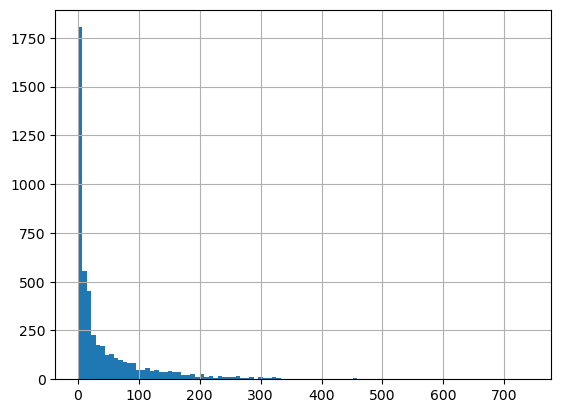

In [9]:
#checking for outliers in the number of votes by employee
churn['numVotes'].hist(bins=100)

array([<Axes: ylabel='stillExists'>], dtype=object)

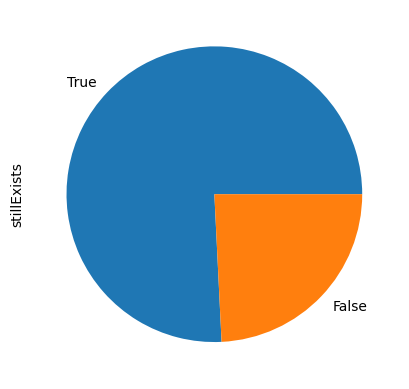

In [10]:
#looking at percentage of churned employees versus retained employees across all companies
churn['stillExists'].value_counts().plot.pie(subplots=True)

array([<Axes: ylabel='vote'>], dtype=object)

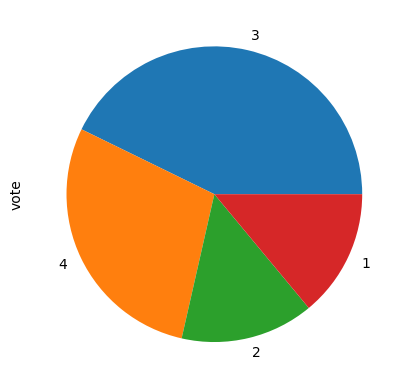

In [11]:
#looking for overall distribution of votes
votes['vote'].value_counts().plot.pie(subplots=True)

<Axes: >

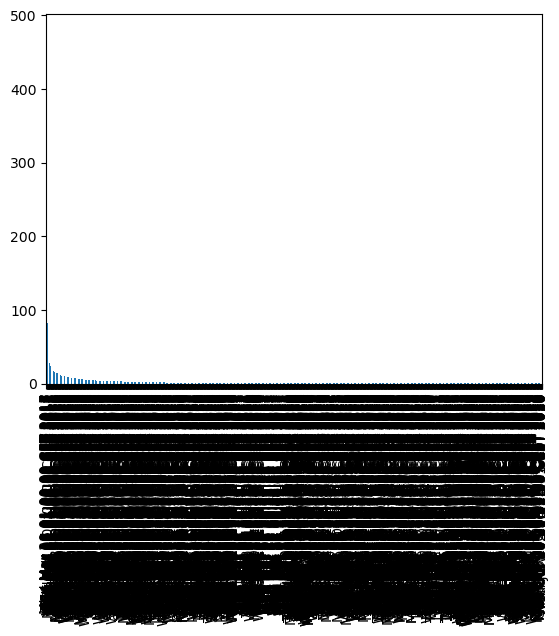

In [25]:
#looking for any outliers in last participation date - it's not pretty but does the job, no outliers
churn['lastParticipationDate'].value_counts().plot(kind='bar')

In [26]:
#this is just the list form of what is shown above
churn['lastParticipationDate'].value_counts()

Mon Mar 20 01:00:00 CET 2017     478
Fri Mar 17 01:00:00 CET 2017     163
Thu Mar 16 01:00:00 CET 2017      97
Sat Mar 18 01:00:00 CET 2017      82
Sun Mar 19 01:00:00 CET 2017      82
                                ... 
Mon Oct 17 16:42:46 CEST 2016      1
Tue Oct 18 13:32:17 CEST 2016      1
Fri Oct 28 08:23:26 CEST 2016      1
Wed Nov 02 10:11:41 CET 2016       1
Mon Jul 04 19:02:03 CEST 2016      1
Name: lastParticipationDate, Length: 1844, dtype: int64

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? I'm surprised that there is no missing data - although I guess because it is collected through an automated, digital process, there is not a lot of opportunity for error
2. Do you have any concerns about your dataset? I am concerned about my ability to manipulate the data to answer my business questions, especially due to the enormous size of the dataset.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? The one thing I did not tackle during this EDA was looking for duplicate data because I felt that aligned better with the task of cleaning data